In [229]:
import pandas as pd
import zipfile, os
import numpy as np
import csv
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL

In [230]:
# Specify the path to your CSV file
!wget https://raw.githubusercontent.com/Danazzz/dataset-beras-scm/master/csv/Beras.csv

df_beras = pd.read_csv('Beras.csv')
df_beras

--2024-06-04 14:58:43--  https://raw.githubusercontent.com/Danazzz/dataset-beras-scm/master/csv/Beras.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42658 (42K) [text/plain]
Saving to: ‘Beras.csv.19’

Beras.csv.19        100%[===================>]  41.66K  --.-KB/s    in 0.01s   

2024-06-04 14:58:43 (3.57 MB/s) - ‘Beras.csv.19’ saved [42658/42658]



,Tanggal,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Harga Beras Penggilingan,Produksi Beras,Harga Beras,UMP,BBM Solar,Tingkat Konsumsi
0,2021-03-15,10,4000,4150,5050,9465,14419,11200,4960,9600,17161
1,2021-03-16,10,3850,4100,4740,9360,14419,11200,4960,9600,17161
2,2021-03-17,10,4160,4230,4950,9400,14419,11200,4960,9600,17161
3,2021-03-18,10,4120,4190,4730,9340,14419,11200,4960,9600,17161
4,2021-03-19,10,4190,4290,4990,9410,14419,11200,4960,9600,17161
...,...,...,...,...,...,...,...,...,...,...,...
673,2023-12-21,30,6770,6850,7980,13100,14391,14000,5444,6800,17598
674,2023-12-22,30,6600,6760,8050,13095,14391,14000,5444,6800,17598
675,2023-12-27,30,6620,6760,8030,13120,14391,14000,5444,6800,17598
676,2023-12-28,30,6650,6760,8020,13120,14391,14000,5444,6800,17598


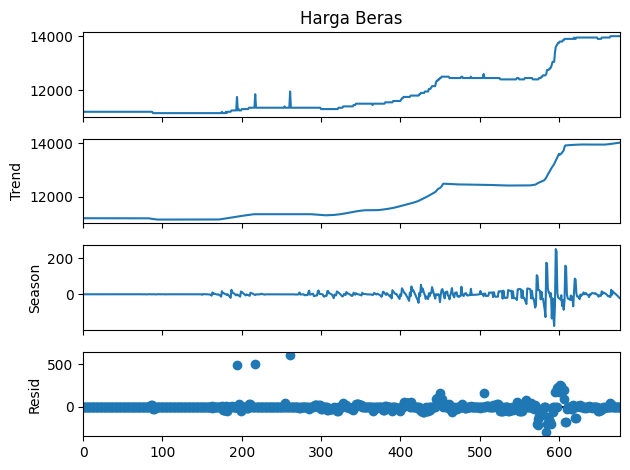

In [232]:
stl = STL(df_beras['Harga Beras'], period=12, robust=True)
result = stl.fit()
fig = result.plot()

In [233]:
def df_to_X_y(df, window_size=3):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [234]:
WINDOW_SIZE = 3
X_trend, y_trend = df_to_X_y(result.trend, WINDOW_SIZE)
X_seasonal, y_seasonal = df_to_X_y(result.seasonal, WINDOW_SIZE)
X_resid, y_resid = df_to_X_y(result.resid, WINDOW_SIZE)
X_trend.shape, y_trend.shape

((675, 3, 1), (675,))

In [235]:
def split_data(X, y):
  q_80 = int(len(X) * .8)

  X_train, y_train = X[:q_80], y[:q_80]
  X_test, y_test = X[q_80:], y[q_80:]
  X_train.shape, y_train.shape, X_test.shape, y_test.shape

  return X_train, y_train, X_test, y_test

In [236]:
X_train_trend, y_train_trend, X_test_trend, y_test_trend = split_data(X_trend, y_trend)
X_train_seasonal, y_train_seasonal, X_test_seasonal, y_test_seasonal = split_data(X_seasonal, y_seasonal)
X_train_resid, y_train_resid, X_test_resid, y_test_resid = split_data(X_resid, y_resid)

In [237]:
y_test_trend

array([12421.60656452, 12421.84076624, 12421.95986709, 12421.92481015,
       12421.77919263, 12421.58810954, 12421.38690935, 12421.17616695,
       12420.93984769, 12420.68770403, 12420.4542889 , 12420.24778023,
       12420.04576115, 12419.84786501, 12419.71470897, 12419.70712492,
       12419.90965437, 12420.30052265, 12420.84128974, 12421.73001443,
       12423.2694792 , 12425.76012651, 12429.36506994, 12433.64228586,
       12437.94657357, 12442.4612124 , 12447.48419259, 12453.15619406,
       12463.40317629, 12486.74755836, 12505.98814779, 12518.32390212,
       12528.77482027, 12539.49362202, 12553.56972422, 12569.00501254,
       12583.85379816, 12597.20163968, 12609.077213  , 12637.14789466,
       12673.30623345, 12721.55654102, 12778.13650501, 12831.74789502,
       12885.33250092, 12937.81792941, 12989.30427619, 13040.00309546,
       13089.56383983, 13136.20429017, 13174.80035571, 13225.05794684,
       13287.77678273, 13350.49967802, 13413.22934306, 13475.97199137,
      

In [238]:
from sklearn.preprocessing import MinMaxScaler
trend_scaler = MinMaxScaler()
seasonal_scaler = MinMaxScaler()
resid_scaler = MinMaxScaler()

def scaling_data(scaler, X_train, y_train, X_test, y_test):
  X_train = scaler.fit_transform(X_train.reshape(540, 3))
  X_test = scaler.transform(X_test.reshape(135, 3))
  y_train = scaler.fit_transform(y_train.reshape(-1,1))
  y_test = scaler.transform(y_test.reshape(-1,1))

  return X_train, y_train, X_test, y_test

In [239]:
X_train_trend, y_train_trend, X_test_trend, y_test_trend = scaling_data(trend_scaler, X_train_trend, y_train_trend, X_test_trend, y_test_trend)
X_train_seasonal, y_train_seasonal, X_test_seasonal, y_test_seasonal = scaling_data(seasonal_scaler, X_train_seasonal, y_train_seasonal, X_test_seasonal, y_test_seasonal)
X_train_resid, y_train_resid, X_test_resid, y_test_resid = scaling_data(resid_scaler, X_train_resid, y_train_resid, X_test_resid, y_test_resid)

In [241]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

def modelling_data(X_train, y_train):
  model = Sequential([layers.Input((3, 1)),
                      layers.LSTM(64),
                      layers.Dense(32, activation='relu'),
                      layers.Dense(32, activation='relu'),
                      layers.Dense(1)])

  model.compile(loss='mse',
                optimizer=Adam(learning_rate=0.0001),
                metrics=['mean_absolute_error'])

  model.fit(X_train, y_train, epochs=100)
  return model

In [242]:
model_trend = modelling_data(X_train_trend, y_train_trend)
model_seasonal = modelling_data(X_train_seasonal, y_train_seasonal)
model_resid = modelling_data(X_train_resid, y_train_resid)

Epoch 1/100
17/17 [==============================] - 2s 4ms/step - loss: 0.1910 - mean_absolute_error: 0.2828
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1795 - mean_absolute_error: 0.2710
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1666 - mean_absolute_error: 0.2579
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1517 - mean_absolute_error: 0.2440
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1341 - mean_absolute_error: 0.2300
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1171 - mean_absolute_error: 0.2156
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1014 - mean_absolute_error: 0.2015
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0865 - mean_absolute_error: 0.1871
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0724 - mean_absolute_error: 0.1758
Epoch 10/1

In [243]:
def predict_train_data(scaler, model, X_train, y_train):
  train_predictions = model.predict(X_train).flatten()
  train_predictions_inv = scaler.inverse_transform(train_predictions.reshape(-1,1))

  plt.plot(train_predictions_inv)
  plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)))
  # plt.plot(dates_train, train_predictions)
  # plt.plot(dates_train, y_train)
  plt.legend(['Training Predictions', 'Training Actual'])

17/17 [==============================] - 1s 2ms/step


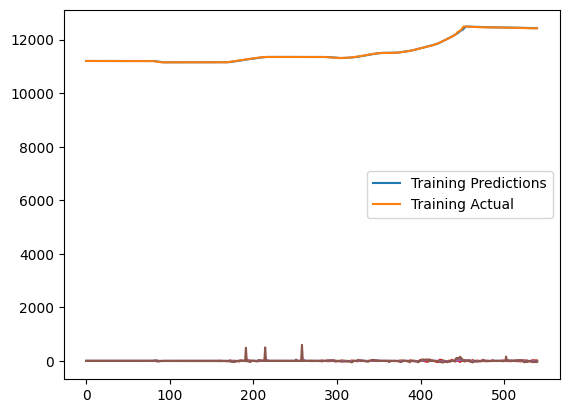

In [244]:
predict_train_data(trend_scaler, model_trend, X_train_trend, y_train_trend)
predict_train_data(seasonal_scaler, model_seasonal, X_train_seasonal, y_train_seasonal)
predict_train_data(resid_scaler, model_resid, X_train_resid, y_train_resid)

In [245]:
def predict_test_data(scaler, model, X_test, y_test):
  test_predictions = model.predict(X_test).flatten()
  test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1,1))
  y_test_inv = scaler.inverse_transform(y_test)

  plt.plot(test_predictions_inv)
  plt.plot(y_test_inv)
  plt.legend(['Test Predictions', 'Test Actual'])

  return test_predictions_inv

5/5 [==============================] - 0s 3ms/step


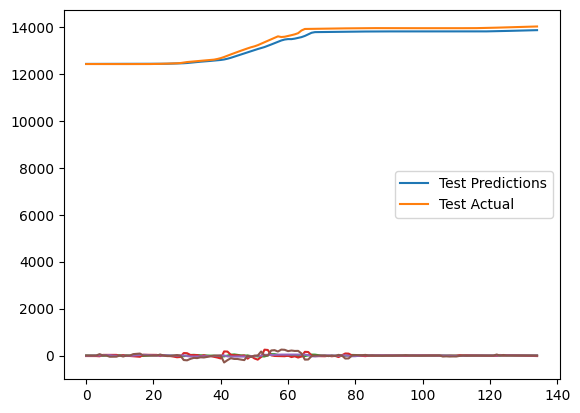

In [246]:
predict_trend = predict_test_data(trend_scaler, model_trend, X_test_trend, y_test_trend)
predict_seasonal = predict_test_data(seasonal_scaler, model_seasonal, X_test_seasonal, y_test_seasonal)
predict_resid = predict_test_data(resid_scaler, model_resid, X_test_resid, y_test_resid)

In [247]:
data_predict_jumlah = predict_trend + predict_seasonal + predict_resid
data_predict_jumlah

array([[12420.544 ],
       [12421.276 ],
       [12421.4375],
       [12422.034 ],
       [12422.104 ],
       [12430.416 ],
       [12437.711 ],
       [12443.726 ],
       [12434.242 ],
       [12426.751 ],
       [12421.395 ],
       [12419.934 ],
       [12420.121 ],
       [12420.724 ],
       [12420.709 ],
       [12429.599 ],
       [12436.796 ],
       [12438.082 ],
       [12443.422 ],
       [12443.269 ],
       [12442.035 ],
       [12442.394 ],
       [12442.999 ],
       [12444.699 ],
       [12446.335 ],
       [12440.432 ],
       [12434.537 ],
       [12429.747 ],
       [12431.542 ],
       [12433.599 ],
       [12440.114 ],
       [12460.149 ],
       [12482.116 ],
       [12487.519 ],
       [12492.522 ],
       [12500.57  ],
       [12513.352 ],
       [12524.668 ],
       [12544.705 ],
       [12556.233 ],
       [12568.918 ],
       [12580.57  ],
       [12608.605 ],
       [12674.87  ],
       [12736.364 ],
       [12767.702 ],
       [12798.463 ],
       [12836

In [248]:
# df_beras['Harga Beras'][q_80:]
y_test_trend_scaler_inverse = trend_scaler.inverse_transform(y_test_trend)
y_test_seasonal_scaler_inverse = seasonal_scaler.inverse_transform(y_test_seasonal)
y_test_resid_scaler_inverse = resid_scaler.inverse_transform(y_test_resid)
y_test_asli = y_test_trend_scaler_inverse + y_test_seasonal_scaler_inverse + y_test_resid_scaler_inverse
y_test_asli

array([[12400.],
       [12400.],
       [12400.],
       [12400.],
       [12450.],
       [12450.],
       [12450.],
       [12400.],
       [12400.],
       [12400.],
       [12400.],
       [12400.],
       [12400.],
       [12400.],
       [12450.],
       [12450.],
       [12450.],
       [12450.],
       [12450.],
       [12450.],
       [12450.],
       [12450.],
       [12450.],
       [12450.],
       [12400.],
       [12400.],
       [12400.],
       [12400.],
       [12400.],
       [12400.],
       [12400.],
       [12400.],
       [12450.],
       [12450.],
       [12450.],
       [12500.],
       [12500.],
       [12550.],
       [12550.],
       [12550.],
       [12550.],
       [12600.],
       [12750.],
       [12750.],
       [12750.],
       [12800.],
       [12800.],
       [12850.],
       [12950.],
       [13050.],
       [13050.],
       [13050.],
       [13400.],
       [13600.],
       [13650.],
       [13700.],
       [13750.],
       [13750.],
       [13800.

In [249]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(data_predict_jumlah,y_test_asli))
mae = mean_absolute_error(data_predict_jumlah,y_test_asli)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

# R Square
r = r2_score(data_predict_jumlah,y_test_asli)

# Mean Magnitude of Relative Error
mmre = (abs((data_predict_jumlah - y_test_asli) / y_test_asli)).mean()

# Median Magnitude of Relative Error
mdmre = np.median(abs((data_predict_jumlah - y_test_asli) / y_test_asli))

# Mean Magnitude of Error Relative
mmer = (abs(data_predict_jumlah - y_test_asli)).mean()

# Mean Square Error
mse = mean_squared_error(data_predict_jumlah, y_test_asli)

# Menampilkan hasil
print("R Square: {:.4f}".format(r))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre))
print("Mean Magnitude of Error Relative: ", mmer)
print("Mean Square Error:", mse)

Root Mean Square Error: 148.92425873275434
Mean Absolute Error: 116.04304832175934
R Square: 0.9413
Mean Magnitude of Relative Error: 0.0084
Median Magnitude of Relative Error: 0.0097
Mean Magnitude of Error Relative:  116.04304832175934
Mean Square Error: 22178.434839100355
